## Hypothesis Testing

In [24]:
import numpy as np
import matplotlib.pyplot as plt

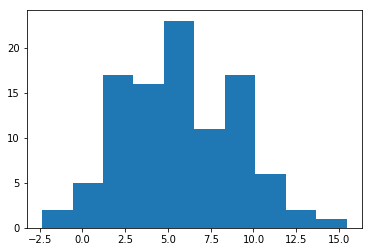

In [25]:
# generate random dataset with gaussian error
N=100
X = 10.0*np.random.random(size=N)

err = np.random.normal(1,2,size=N)

plt.hist(X+err)
plt.show()

In [26]:
# null hypothesis HO: average is 5
# test statistics
t = (np.mean(X+err)-5.0)/np.std(X+err)*np.sqrt(float(N))
print t

2.0812851264525185


In [27]:
import this

## Monte Carlo

In [28]:
from scipy import stats

In [29]:
# using random numbers to create numeric results
# Estimate the Value of pi
r=1.0
box_area=4.0

#Size of random samples
NUM=10000

# (0,0) is center of square
X = np.random.uniform(low=-1,high=1,size=NUM)
Y = np.random.uniform(low=-1,high=1,size=NUM)


#Distance to the center
distance = np.sqrt(X**2+Y**2)

#counts how many points inside circle
N_inside = np.sum(distance<1.0)

#circle area
circle_area = N_inside/float(NUM)*box_area

print circle_area/r**2



3.1336


<function matplotlib.pyplot.show>

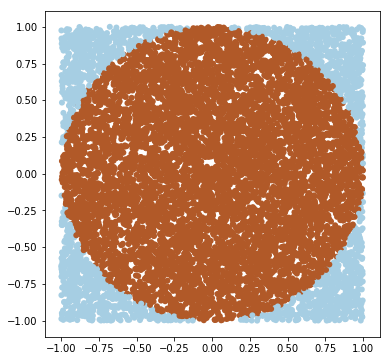

In [30]:
# illistrate it
fig = plt.figure(figsize=(6,6))
plt.scatter(X,Y,c=distance<1.0,edgecolor='none',cmap=plt.cm.Paired)
plt.show

In [42]:
# integral
def f(x):
    return x**2+4*x*np.sin(x)
a=2.0
b=3.0

#size of samples
NUM=1000

X = np.random.uniform(low=a,high=b,size=NUM)
Y = f(X)

f_ave = np.sum(Y)/float(NUM)
MC_estimate = (b-a)*f_ave

def anti_derivative_f(x):
    return x**3/3.0+4*np.sin(x)-4.0*x*np.cos(x)

exact_val = anti_derivative_f(b)-anti_derivative_f(a)

print MC_estimate, exact_val

11.829578674558052 11.811358925098283


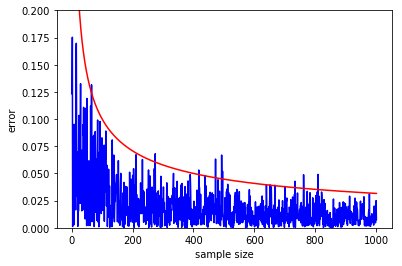

In [46]:
estimate = np.zeros(1000)
for N in np.arange(1,1001):
    X = np.random.uniform(low=a,high=b,size=N)
    Y = f(X)
    estimate[N-1] = (b-a)*np.sum(Y)/float(N)

error = np.abs(estimate-exact_val)
size = np.linspace(1,1001,1000)

plt.plot(size,error,color='blue')
plt.plot(size,1/np.sqrt(size),color='red')
plt.xlabel('sample size')
plt.ylabel('error')
plt.ylim(0,0.2)
plt.show()

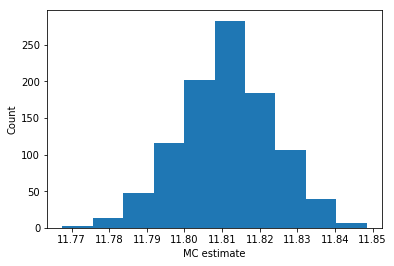

11.811289257765361
0.012409840858173761


In [48]:
m = 1000
N = 1000
estimates = np.zeros(m)
for i in np.arange(0,m):
    X = np.random.uniform(low=a,high=b,size=N)
    Y = f(X)
    estimates[i] = (b-a)*np.sum(Y)/float(N)
    
plt.hist(estimates)
plt.xlabel('MC estimate')
plt.ylabel('Count')
plt.show()
print np.mean(estimates)
print np.std(estimates)